In [ ]:
#| export
import svgutils
from svgutils.compose import *
import dabest
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import esploco.plotTools
from esploco.plotTools import setFont
setFont('inter', 6)
plt.style.use('seaborn-colorblind')
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
from matplotlib import font_manager
import matplotlib
font_dirs = ["/Users/sangyuxu/Library/Fonts"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

import pickle
import pandas as pd
import scipy
import numpy as np
import dabest
paperpath = '/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/'
imagepath = paperpath + 'Figures20240202/'
figurepath = imagepath + '/Figure7/'

/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_93394/2483783077.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')
/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_93394/2483783077.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [ ]:
starve = pd.read_csv('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Starvation Resistance/starve.csv',delimiter=',')
starve = starve.set_index('Day')
starvePerc = starve/starve.iloc[1,:]

In [ ]:
starvePerc

,R50Csch,R50;W,TrhCsch,W-Trh,W-C,TrhVNCCsch,W-VNCCsch,Trh>ACR1
Day,,,,,,,,
0,1.00,1.00,1.000000,1.00,1.00,1.000000,1.000000,1.0
1,1.00,1.00,1.000000,1.00,1.00,1.000000,1.000000,1.0
2,0.44,0.80,0.839080,1.00,0.95,0.979592,1.000000,0.8
3,0.00,0.08,0.057471,0.52,0.15,0.755102,0.583333,0.2
4,0.00,0.00,0.000000,0.00,0.00,0.285714,0.041667,0.0
5,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<matplotlib.legend.Legend>

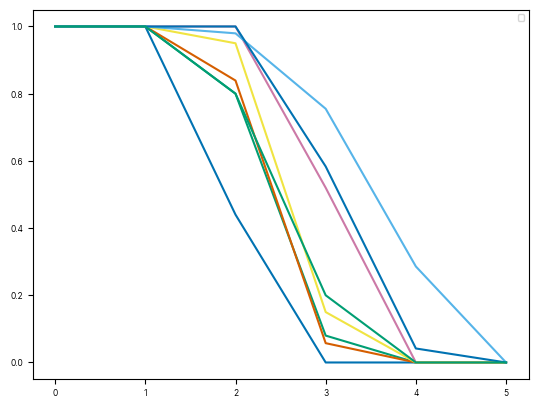

In [ ]:
plt.plot(starvePerc)
plt.legend()

In [ ]:
starve1 = pd.read_csv('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Starvation Resistance/starve.csv',delimiter=',')
df = pd.melt(starve1, id_vars=['Day'], value_vars= starve1.columns[1::], value_name='count', var_name = 'genotype')
df['total'] = [df.loc[df['genotype'] == df.iloc[n]['genotype']]['count'].max() for n in range(len(df))]
df1 = pd.DataFrame(np.nan, index=df.index, columns=np.arange(0, df.total.max(), 1))
for i in range(len(df1)):
    success = df.iloc[i]['count']
    total = df.iloc[i]['total']
    binString = np.zeros(total)
    binString[0:success] = 1
    df1.iloc[i, 0:total] = binString
df_t = pd.concat([df, df1], axis = 1)
df_t_melt = pd.melt(df_t, id_vars = df.columns, value_vars = df1.columns, value_name = 'success').rename(columns = {'variable': 'ID'})
df_t_melt['genotype_day'] = df_t_melt['genotype']+ '_'+df_t_melt['Day'].astype('str')
df_t_melt_pivot = df_t_melt.pivot(index='ID', columns='genotype_day', values='success').reset_index()

/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_93394/2910437028.py:14: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_t_melt_pivot = df_t_melt.pivot(index='ID', columns='genotype_day', values='success').reset_index()


In [ ]:
df_t_melt_pivot

genotype_day,ID,R50;W_0,R50;W_1,R50;W_2,R50;W_3,R50;W_4,R50;W_5,R50Csch_0,R50Csch_1,R50Csch_2,...,W-Trh_2,W-Trh_3,W-Trh_4,W-Trh_5,W-VNCCsch_0,W-VNCCsch_1,W-VNCCsch_2,W-VNCCsch_3,W-VNCCsch_4,W-VNCCsch_5
0,0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2,2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
3,3,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
4,4,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_std = df_t_melt_pivot.std()
df_std
starvePerc_ste = starvePerc.copy()
starvePerc_std = starvePerc.copy()
for i in range(6):
    for j in starvePerc.columns:
        starvePerc_std.loc[i, j] = (df_std[j+'_'+str(i)])
        starvePerc_ste.loc[i, j] = (df_std[j+'_'+str(i)])/np.sqrt(starve.loc[0][j])
        
starvePerc_ste
plt.plot(starvePerc)



/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_93394/2153685109.py:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect1=plt.Rectangle(xy=(0,1.2), width=5, height=0.1, color='powderblue',edgecolor = 'gray' )
/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_93394/2153685109.py:21: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect2=plt.Rectangle(xy=(1,1.1), width=4, height=0.1, color='pink' ,edgecolor = 'gray' )
/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_93394/2153685109.py:22: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect3=plt.Rectangle(xy=(0,1.1), width=0.99, height=0.1, color='whitesmoke' ,edgecolor = 'gray' )


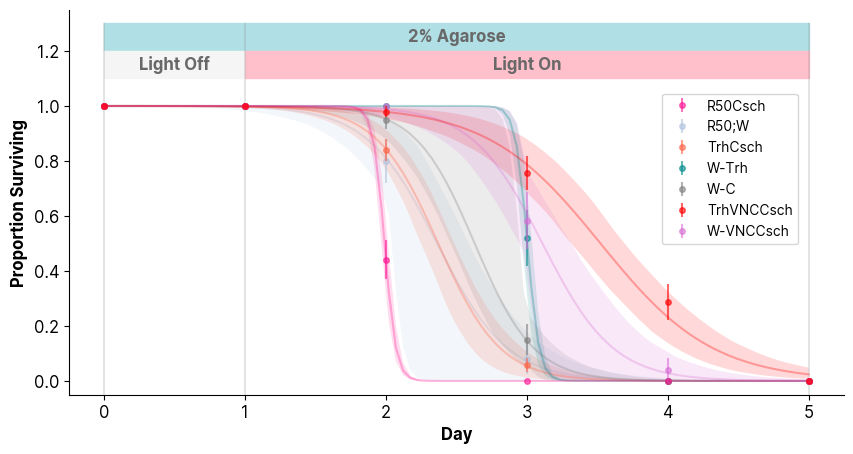

In [ ]:
setFont('inter', 12)

f = plt.figure(figsize = (10, 5))
palette = {'R50Csch':'deeppink', 'R50;W':'lightsteelblue', 'TrhCsch':'tomato', 'W-Trh':'darkcyan', 'W-C':'gray', 'TrhVNCCsch':'red',
       'W-VNCCsch':'orchid'}
zorder_list = {0: 10, 1:1, 2:2, 3:3, 4:4, 5:20, 6:6}
for i in range(7):
    df_t_sub = df_t.loc[df_t.genotype==starvePerc.columns[i]].drop(['genotype', 'count', 'total'], axis = 1)
    df_t_sub_melt = df_t_sub.melt(id_vars=['Day'], value_vars=df_t_sub.columns[1::])
    g = sns.regplot(x="Day", y="value", data=df_t_sub_melt, logistic=True, color = palette[starvePerc.columns[i]], 
                    scatter = False, line_kws={'alpha': 0.3, 'zorder':zorder_list[i], 'linewidth':1.5})
for i in range(7):
    plt.errorbar(starvePerc.index, starvePerc.iloc[:, i], yerr=starvePerc_ste.iloc[:, i], fmt='o',
                 markersize = 4, alpha = .6, color = palette[starvePerc.columns[i]], 
                 label = starvePerc.columns[i], zorder = zorder_list[i])
f.axes[0].plot([0, 0], [1.3, -0.05], color = 'gray', linewidth = 0.3 )
f.axes[0].plot([1, 1], [1.3, -0.05], color = 'gray', linewidth = 0.3 )
f.axes[0].plot([5, 5], [1.3, -0.05], color = 'gray', linewidth = 0.3 )

rect1=plt.Rectangle(xy=(0,1.2), width=5, height=0.1, color='powderblue',edgecolor = 'gray' )
rect2=plt.Rectangle(xy=(1,1.1), width=4, height=0.1, color='pink' ,edgecolor = 'gray' )
rect3=plt.Rectangle(xy=(0,1.1), width=0.99, height=0.1, color='whitesmoke' ,edgecolor = 'gray' )
f.axes[0].add_patch(rect1)
f.axes[0].add_patch(rect2)
f.axes[0].add_patch(rect3)
f.axes[0].set_ylim(-0.05, 1.35)
f.axes[0].spines[['right', 'top']].set_visible(False)
f.axes[0].text(0.5, 1.15, 'Light Off', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
f.axes[0].text(3, 1.15, 'Light On', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
f.axes[0].text(2.5, 1.25, '2% Agarose', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
plt.legend(fontsize = 10, loc='upper right', bbox_to_anchor=(.95, .8))
plt.ylabel('Proportion Surviving', weight = 'bold')
plt.xlabel('Day', weight = 'bold')
plt.savefig('starvecurve.png', dpi = 300)
plt.savefig(figurepath+'/images/starvecurve.svg')


In [ ]:
plt.savefig(figurepath+'/images/starvecurve.svg')


<Figure size 640x480 with 0 Axes>